# Exercise Solutions - Arul Prakash Pugazhendi

## Exercise 1:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [7]:
def fitness_function(v):
    m = 1+ math.cos(0.04 * v)**2
    n = math.exp(-(v)**2 /20000)
    return m*n

## Exercise 2: Display Fitness Surface

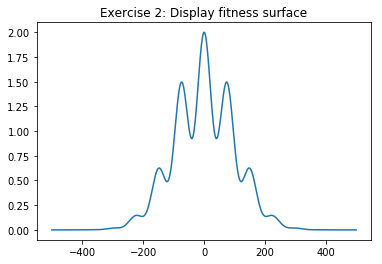

In [8]:
x= range(-500, 500, 1)
y= [fitness_function(a) for a in x]
plt.plot(x,y)
plt.title("Exercise 2: Display fitness surface")
plt.show()

## Exercise 3: Annealing Function that exits after finding 90% peak

In [10]:
low =-500
high=500
interval = high-low
steps = 25000
minsteps = 1000
xvalues = []
yvalues = []
exit_counter = []
T=[]
maxima = {}

def get_neighbour(x, s):
	r= interval * random.uniform(-0.5,0.5) * (1-s)

	if (x+r) < low:
		n = low
	elif (x+r) > high:
		n= high
	else:
		n = x+r
	return n

def get_temperature(temp, s):
	return temp+s

def acceptance_probability(cost, newcost, temp):
	if newcost > cost:
		return 1
	else:
		p = np.exp(-(cost-newcost) * temp)
		#print(f"P: {p}")
		return p

def annealing(x,t):
	y = fitness_function(x)
	xvalues.append(x)
	yvalues.append(y)

	for step in range(steps):
		s = step / float(steps)
		t = get_temperature(t,s)
		nx = get_neighbour(x, s)
		ny = fitness_function(nx)
		exit_counter.append(round(y,2))
		acprob = acceptance_probability(y, ny, t)
		#For exercise 4, we need to keep track of local maxima
		if acprob == 1:
			maxima[step] = ny
		if acprob > random.random():
			print(f"#{step}/{steps} : T = {t}, x = {x}, y = {y}, nx = {nx}, ny = {ny}")
			x = nx
			y = ny
			xvalues.append(x)
			yvalues.append(y)
			T.append(t)

		if step > minsteps and ( exit_counter.count(round(y,2)) >= (int(step*0.9))):
			print("Stopping Algorithm since peak is found about 90% of the time")
			print(f"Temperature: {t}, Steps: {step}, Peak: {y}")
			break
	print(max(yvalues))

In [11]:
annealing(250, 10.0)

#0/25000 : T = 10.0, x = 250, y = 0.07487033766651026, nx = 412.8229480597603, ny = 0.0002949235926124454
#1/25000 : T = 10.00004, x = 412.8229480597603, y = 0.0002949235926124454, nx = 186.87073359011544, ny = 0.19836596446253033
#2/25000 : T = 10.00012, x = 186.87073359011544, y = 0.19836596446253033, nx = -275.20202289858935, ny = 0.022671395142413682
#3/25000 : T = 10.000240000000002, x = -275.20202289858935, y = 0.022671395142413682, nx = -500, ny = 4.347256336599805e-06
#4/25000 : T = 10.0004, x = -500, y = 4.347256336599805e-06, nx = -500, ny = 4.347256336599805e-06
#5/25000 : T = 10.0006, x = -500, y = 4.347256336599805e-06, nx = -500, ny = 4.347256336599805e-06
#6/25000 : T = 10.00084, x = -500, y = 4.347256336599805e-06, nx = -139.07543357222698, ny = 0.5950058578098399
#7/25000 : T = 10.00112, x = -139.07543357222698, y = 0.5950058578098399, nx = -106.22590055523754, ny = 0.6824459491835739
#8/25000 : T = 10.00144, x = -106.22590055523754, y = 0.6824459491835739, nx = -70.69

#9899/25000 : T = 1970.0020000000002, x = -0.0414603453235909, y = 1.9999970777703668, nx = 0.05927987611735694, ny = 1.9999940260352453
#10063/25000 : T = 2035.48064, x = 0.05927987611735694, y = 1.9999940260352453, nx = -0.046597664731454796, ny = 1.999996308722403
#11450/25000 : T = 2632.279000000002, x = -0.046597664731454796, y = 1.999996308722403, nx = 0.44354748488394513, ny = 1.9996655877878635
Stopping Algorithm since peak is found about 90% of the time
Temperature: 3051.31784, Steps: 12331, Peak: 1.9996655877878635
1.9999998757613247


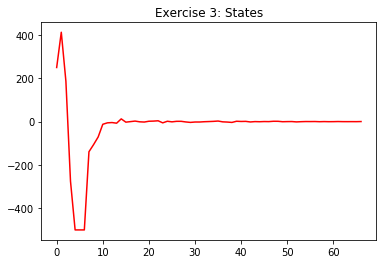

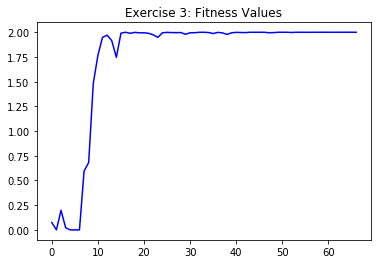

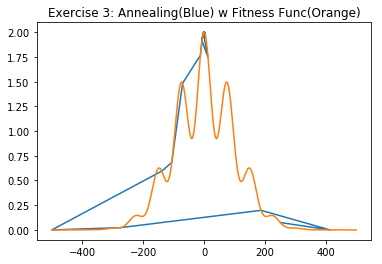

In [16]:
plt.figure()
plt.plot(xvalues, 'r')
plt.title("Exercise 3: States")
plt.show()

plt.figure()
plt.plot(yvalues, 'b')
plt.title("Exercise 3: Fitness Values")
plt.show()

plt.figure()
plt.plot(xvalues, yvalues)
x = range(-500, 500, 1)
y = [fitness_function(a) for a in x]
plt.plot(x, y)
plt.title("Exercise 3: Annealing(Blue) w Fitness Func(Orange)")
plt.show()

## Exercise 4: Intermediate best fitnesses with iterations

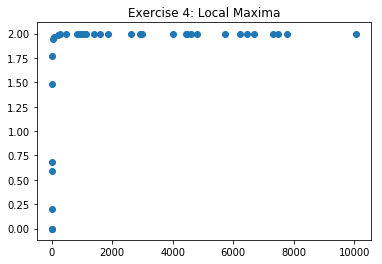

In [15]:
plt.figure()
plt.scatter(maxima.keys(), maxima.values())
plt.title("Exercise 4: Local Maxima")
plt.show()